#### Foundations of Machine Learning Aug-Nov 2024
##### Sakshi Badole CS24MTECH11008
Question 6: __Gradient Boosting__ on the popular Lending Club dataset 

Import Statements

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
%matplotlib inline
np.random.seed(42)

Read data into pandas dataframes

In [23]:
Train_data = pd.read_csv('loan_train.csv', sep=",")
Test_data = pd.read_csv('loan_test.csv', sep=",")

#### Data Preprocessing

In [24]:
# Display the first few rows of the training data
print(Train_data.head())


        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0   573354     737474      10000        10000       9950.00000   36 months   
1   476321     603324      15000        15000      14800.00000   36 months   
2   451484     556265       2000         2000       2000.00000   36 months   
3  1018129    1246557      35000        35000      33951.84413   60 months   
4   800018    1005270      14000        14000      14000.00000   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0    7.51%       311.11     A        A4  ...                NaN   
1    8.94%       476.58     A        A5  ...                NaN   
2   13.57%        67.94     C        C3  ...                NaN   
3   20.89%       944.71     F        F1  ...                NaN   
4   17.49%       351.64     D        D5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               

In [25]:
# Display summary statistics
print(Train_data.describe())

                 id     member_id     loan_amnt   funded_amnt  \
count  2.499900e+04  2.499900e+04  24999.000000  24999.000000   
mean   6.824732e+05  8.498388e+05  11262.498500  10985.099404   
std    2.094886e+05  2.642564e+05   7391.976258   7123.122668   
min    5.574200e+04  7.367300e+04    500.000000    500.000000   
25%    5.165330e+05  6.672200e+05   5562.500000   5500.000000   
50%    6.647370e+05  8.496710e+05  10000.000000  10000.000000   
75%    8.355255e+05  1.044732e+06  15000.000000  15000.000000   
max    1.076863e+06  1.304884e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count      24999.00000  24999.000000  2.499900e+04  24999.000000   
mean       10435.34441    325.506824  6.994135e+04     13.330210   
std         7064.11343    206.995053  6.939411e+04      6.651602   
min            0.00000     16.080000  4.080000e+03      0.000000   
25%         5000.00000    168.640000  4.200000e+04      8.220000   
50%   

In [68]:
# Check for missing values
print(Train_data.isnull().sum())

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        17
tot_hi_cred_lim               24999
total_bal_ex_mort             24999
total_bc_limit                24999
total_il_high_credit_limit    24999
Length: 111, dtype: int64


In [27]:
pro_Train_data = Train_data.copy()
pro_Test_data = Test_data.copy()

In [28]:
# Checking data types
print("Data types of features:\n", Train_data.dtypes)

categorical_cols = Train_data.select_dtypes(include=['object', 'bool']).columns
print("Categorical columns:\n", categorical_cols)

print("\nDataFrame Info:")
Train_data.info()

Data types of features:
 id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object
Categorical columns:
 Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status',
       'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d',
       'application_type'],
      dtype='object')

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24999 entries, 0 to 24998
Columns:

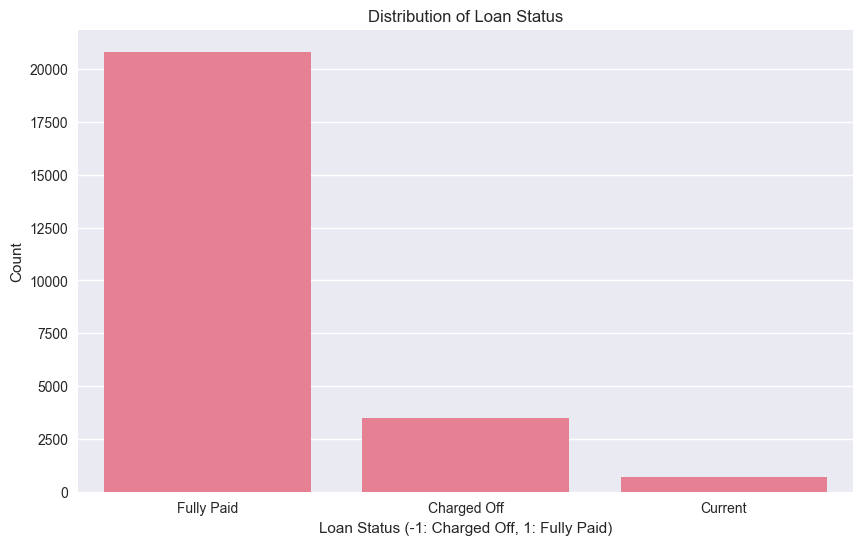


Class Distribution Percentages:
loan_status
Fully Paid     83.31
Charged Off    13.90
Current         2.79
Name: proportion, dtype: float64


In [29]:
plt.figure(figsize=(10, 6))
loan_status_counts = Train_data['loan_status'].value_counts()
sns.barplot(x=loan_status_counts.index, y=loan_status_counts.values)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status (-1: Charged Off, 1: Fully Paid)')
plt.ylabel('Count')
plt.show()

print("\nClass Distribution Percentages:")
print((Train_data['loan_status'].value_counts(normalize=True) * 100).round(2))


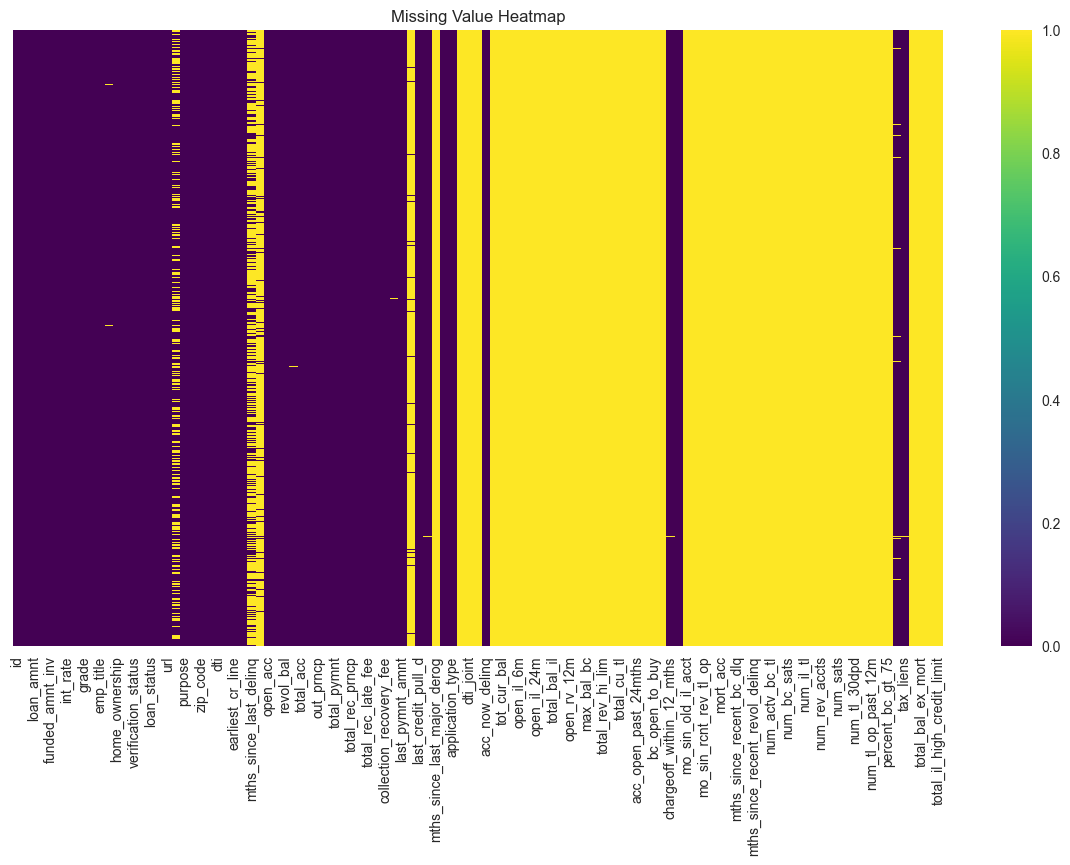

In [30]:
plt.figure(figsize=(15, 8))
sns.heatmap(Train_data.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.show()

In [31]:
missing_stats = pd.DataFrame({
        'missing_count': pro_Train_data.isnull().sum(),
        'missing_percentage': (pro_Train_data.isnull().sum() / len(pro_Train_data) * 100).round(2)
    }).sort_values('missing_percentage', ascending=False)
    
    # Add dtype information
missing_stats['dtype'] = pro_Train_data.dtypes
print("Missing Value Analysis:")
print(missing_stats[missing_stats['missing_count'] > 0])

Missing Value Analysis:
                            missing_count  missing_percentage    dtype
num_il_tl                           24999              100.00  float64
num_bc_sats                         24999              100.00  float64
num_bc_tl                           24999              100.00  float64
num_actv_bc_tl                      24999              100.00  float64
num_accts_ever_120_pd               24999              100.00  float64
...                                   ...                 ...      ...
revol_util                             29                0.12   object
collections_12_mths_ex_med             29                0.12  float64
tax_liens                              17                0.07  float64
title                                   8                0.03   object
emp_title                               6                0.02   object

[67 rows x 3 columns]


#### Checking the percent of missing values in each column/feature of __Train data__ and __drop__ the features with ***more than 60 percent*** missing values

In [32]:
# Remove columns with too many missing values
cols_too_many_missing = missing_stats[
    missing_stats['missing_percentage'] > 60
].index.tolist()

pro_Train_data = pro_Train_data.drop(columns=cols_too_many_missing)
print("New shape:", pro_Train_data.shape)

New shape: (24999, 54)


#### Dropping the same columns from the Test Data

In [33]:
pro_Test_data = pro_Test_data.drop(columns = cols_too_many_missing)
print("New shape:", pro_Test_data.shape)

New shape: (14718, 54)


#### Mapping Fully-Paid, Charged-off to 1 and -1, and dropping Current from the loan status feature

In [34]:
target_map = {
    'Fully Paid': 1,
    'Charged Off': -1,
    'Current': 0
}
pro_Train_data['loan_status'] = pro_Train_data['loan_status'].map(target_map)
pro_Train_data = pro_Train_data[pro_Train_data['loan_status'] != 0]  # Remove 'Current' loans
print("Shape after removing current loans:", pro_Train_data.shape)
print("\nClass distribution:")
print(pro_Train_data['loan_status'].value_counts())

Shape after removing current loans: (24301, 54)

Class distribution:
loan_status
 1    20827
-1     3474
Name: count, dtype: int64


In [35]:
pro_Test_data['loan_status'] = pro_Test_data['loan_status'].map(target_map)
pro_Test_data = pro_Test_data[pro_Test_data['loan_status'] != 0]  # Remove 'Current' loans
print("Shape after removing current loans:", pro_Test_data.shape)
print("\nClass distribution:")
print(pro_Test_data['loan_status'].value_counts())

Shape after removing current loans: (14276, 54)

Class distribution:
loan_status
 1    12123
-1     2153
Name: count, dtype: int64


#### Checking number of unique values in each feature

In [36]:
#Features having only 2 values(including NaN) or all values different
for i in pro_Train_data.columns:
    if(pro_Train_data[i].nunique(dropna=False) <= 2 or pro_Train_data[i].nunique(dropna=False) == pro_Train_data.shape[0]):
        print(i , pro_Train_data[i].nunique(dropna=False))


id 24301
member_id 24301
term 2
loan_status 2
pymnt_plan 1
url 24301
initial_list_status 1
out_prncp 1
out_prncp_inv 1
collections_12_mths_ex_med 2
policy_code 1
application_type 1
acc_now_delinq 1
chargeoff_within_12_mths 2
delinq_amnt 1
tax_liens 2


#### Checking correlation of numeric features with the target value (loan status)

In [37]:
# Getting all the numeric features
numeric_features = pro_Train_data.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation with target variable
correlations = pd.DataFrame()

correlations['correlation'] = pro_Train_data[numeric_features].corr()['loan_status'].abs()
correlations = correlations.sort_values('correlation', ascending=True)

print("\nCorrelations with loan_status:")
print(correlations)


Correlations with loan_status:
                            correlation
open_acc                       0.000698
revol_bal                      0.006231
total_rec_int                  0.013844
delinq_2yrs                    0.013968
total_acc                      0.017341
installment                    0.026918
funded_amnt_inv                0.038255
annual_inc                     0.040116
member_id                      0.044758
dti                            0.046135
id                             0.048124
pub_rec_bankruptcies           0.050213
pub_rec                        0.050736
funded_amnt                    0.056209
loan_amnt                      0.058606
inq_last_6mths                 0.075122
total_rec_late_fee             0.170033
collection_recovery_fee        0.216374
last_pymnt_amnt                0.221733
total_pymnt_inv                0.230976
total_pymnt                    0.233951
total_rec_prncp                0.334436
recoveries                     0.340974
loan_sta

#### Removing irrelavent columns which doesn't affect the target prediction mmuch

In [38]:
# Remove irrelevant columns
cols_to_drop = [
    'id', 'member_id', 'url', 'desc', 'title', 'zip_code',
    'funded_amnt', 'funded_amnt_inv',
    'out_prncp', 'out_prncp_inv',
    'total_pymnt_inv',
    'total_rec_late_fee', 'collection_recovery_fee',
    'policy_code',
    'pymnt_plan',
    'initial_list_status','emp_title'
]

cols_to_drop = [col for col in cols_to_drop if col in pro_Train_data.columns]
pro_Train_data = pro_Train_data.drop(columns=cols_to_drop)
print("Shape after dropping irrelevant columns:", pro_Train_data.shape)

Shape after dropping irrelevant columns: (24301, 37)


In [39]:
pro_Test_data = pro_Test_data.drop(columns = cols_to_drop)
print("New Shape for Test data:", pro_Test_data.shape)

New Shape for Test data: (14276, 37)


#### Processing Date columns

In [40]:
#Process date columns
date_columns = ['issue_d', 'last_pymnt_d', 'last_credit_pull_d', 'earliest_cr_line']
date_columns = [col for col in date_columns if col in pro_Train_data.columns]

for col in date_columns:
    pro_Train_data[col] = pd.to_datetime(pro_Train_data[col], format='%d-%b', errors='coerce')
    pro_Train_data[f'{col}_month'] = pro_Train_data[col].dt.month
    pro_Train_data[f'{col}_year'] = pro_Train_data[col].dt.year
    pro_Train_data = pro_Train_data.drop(columns=[col])

print("New date-derived columns:", [col for col in pro_Train_data.columns if '_month' in col or '_year' in col])


New date-derived columns: ['issue_d_month', 'issue_d_year', 'last_pymnt_d_month', 'last_pymnt_d_year', 'last_credit_pull_d_month', 'last_credit_pull_d_year', 'earliest_cr_line_month', 'earliest_cr_line_year']


In [41]:
date_columns = [col for col in date_columns if col in pro_Test_data.columns]

for col in date_columns:
    pro_Test_data[col] = pd.to_datetime(pro_Test_data[col], format='%d-%b', errors='coerce')
    pro_Test_data[f'{col}_month'] = pro_Test_data[col].dt.month
    pro_Test_data[f'{col}_year'] = pro_Test_data[col].dt.year
    pro_Test_data = pro_Test_data.drop(columns=[col])

print("New date-derived columns for Test data:", [col for col in pro_Test_data.columns if '_month' in col or '_year' in col])


New date-derived columns for Test data: ['issue_d_month', 'issue_d_year', 'last_pymnt_d_month', 'last_pymnt_d_year', 'last_credit_pull_d_month', 'last_credit_pull_d_year', 'earliest_cr_line_month', 'earliest_cr_line_year']


#### Processing loan term (term) feature 

In [42]:
# Term Train data
if 'term' in pro_Train_data.columns:
    pro_Train_data['term'] = pro_Train_data['term'].str.extract(r'(\d+)').astype(float)

# Term
if 'term' in pro_Test_data.columns:
    pro_Test_data['term'] = pro_Test_data['term'].str.extract(r'(\d+)').astype(float)

#### Processing Interest rate

In [43]:
# Interest rate
if 'int_rate' in pro_Train_data.columns:
    pro_Train_data['int_rate'] = pro_Train_data['int_rate'].str.rstrip('%').astype(float)

# Interest rate Test data
if 'int_rate' in pro_Test_data.columns:
    pro_Test_data['int_rate'] = pro_Test_data['int_rate'].str.rstrip('%').astype(float)

In [44]:
# Revolving utilization
if 'revol_util' in pro_Train_data.columns:
    pro_Train_data['revol_util'] = pro_Train_data['revol_util'].str.rstrip('%').astype(float)

# Revolving utilization Test data
if 'revol_util' in pro_Test_data.columns:
    pro_Test_data['revol_util'] = pro_Test_data['revol_util'].str.rstrip('%').astype(float)

#### Processing the employment length

In [45]:
# Employment length
if 'emp_length' in pro_Train_data.columns:
    emp_length_map = {
        '10+ years': 10,
        '< 1 year': 0,
        '1 year': 1,
        '2 years': 2,
        '3 years': 3,
        '4 years': 4,
        '5 years': 5,
        '6 years': 6,
        '7 years': 7,
        '8 years': 8,
        '9 years': 9
    }
    pro_Train_data['emp_length'] = pro_Train_data['emp_length'].map(emp_length_map)

print("\nNumeric columns after processing Train data:")
print(pro_Train_data.select_dtypes(include=['float64', 'int64']).columns.tolist())


# Employment length Test data
if 'emp_length' in pro_Test_data.columns:
    emp_length_map = {
        '10+ years': 10,
        '< 1 year': 0,
        '1 year': 1,
        '2 years': 2,
        '3 years': 3,
        '4 years': 4,
        '5 years': 5,
        '6 years': 6,
        '7 years': 7,
        '8 years': 8,
        '9 years': 9
    }
    pro_Test_data['emp_length'] = pro_Test_data['emp_length'].map(emp_length_map)

print("\nNumeric columns after processing Test data:")
print(pro_Test_data.select_dtypes(include=['float64', 'int64']).columns.tolist())


Numeric columns after processing Train data:
['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'loan_status', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'recoveries', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', 'last_pymnt_d_month', 'last_pymnt_d_year', 'earliest_cr_line_month', 'earliest_cr_line_year']

Numeric columns after processing Test data:
['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'loan_status', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'recoveries', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', '

#### Handle remaining missing values

In [46]:
# For numeric columns
numeric_cols = pro_Train_data.select_dtypes(include=['float64', 'int64']).columns
pro_Train_data[numeric_cols] = pro_Train_data[numeric_cols].fillna(pro_Train_data[numeric_cols].median())

# For numeric columns
numeric_cols_test = pro_Test_data.select_dtypes(include=['float64', 'int64']).columns
pro_Test_data[numeric_cols_test] = pro_Test_data[numeric_cols_test].fillna(pro_Test_data[numeric_cols_test].median())



In [47]:
# For categorical columns
categorical_cols = pro_Train_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    pro_Train_data[col] = pro_Train_data[col].fillna(pro_Train_data[col].mode()[0])

# For categorical columns
categorical_cols_test = pro_Test_data.select_dtypes(include=['object']).columns
for col in categorical_cols_test:
    pro_Test_data[col] = pro_Test_data[col].fillna(pro_Test_data[col].mode()[0])


In [48]:
# Verify no missing values remain
print("\nMissing values after imputation:")
print("Train data: ",pro_Train_data.isnull().sum().sum())

print("Test data: ",pro_Test_data.isnull().sum().sum())


Missing values after imputation:
Train data:  0
Test data:  0


In [49]:
pro_Train_data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_pymnt', 'total_rec_prncp', 'total_rec_int',
       'recoveries', 'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', 'issue_d_month',
       'issue_d_year', 'last_pymnt_d_month', 'last_pymnt_d_year',
       'last_credit_pull_d_month', 'last_credit_pull_d_year',
       'earliest_cr_line_month', 'earliest_cr_line_year'],
      dtype='object')

In [50]:
pro_Test_data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_pymnt', 'total_rec_prncp', 'total_rec_int',
       'recoveries', 'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', 'issue_d_month',
       'issue_d_year', 'last_pymnt_d_month', 'last_pymnt_d_year',
       'last_credit_pull_d_month', 'last_credit_pull_d_year',
       'earliest_cr_line_month', 'earliest_cr_line_year'],
      dtype='object')

In [51]:
print(pro_Train_data.shape)
print(pro_Test_data.shape)

(24301, 41)
(14276, 41)


#### One-Hot Encoding the categorical feature columns

In [52]:
categorical_cols = ['home_ownership', 'verification_status', 'purpose', 'addr_state', 'grade', 'sub_grade', 'application_type']

pro_Train_data = pd.get_dummies(pro_Train_data, columns=categorical_cols, drop_first=True)
pro_Test_data = pd.get_dummies(pro_Test_data, columns=categorical_cols, drop_first=True)

pro_Train_data, pro_Test_data = pro_Train_data.align(pro_Test_data, join='outer', axis=1, fill_value=0)

print("\nShape after one-hot encoding Train data:", pro_Train_data.shape)
print("\nShape after one-hot encoding Test data:", pro_Test_data.shape)


Shape after one-hot encoding Train data: (24301, 142)

Shape after one-hot encoding Test data: (14276, 142)


####  Checking the skewness of the numeric columns and standardise them

In [53]:
#Checking the skewness of the Train data features
from scipy.stats import skew 
skewed_cols = []
for col in numeric_cols:
    if skew(pro_Train_data[col]) > 1:
        skewed_cols.append(col)
        print("Skewness ", col, skew(pro_Train_data[col]))

print(skewed_cols)


Skewness  loan_amnt 1.058863592834336
Skewness  term 1.1489459516316003
Skewness  installment 1.1330415079895555
Skewness  annual_inc 36.43036461891884
Skewness  delinq_2yrs 5.308493003653519
Skewness  inq_last_6mths 1.3780053502458245
Skewness  open_acc 1.0134319901934032
Skewness  pub_rec 4.731088116201037
Skewness  revol_bal 3.1447823727470747
Skewness  total_pymnt 1.348094405097651
Skewness  total_rec_prncp 1.1390217649699286
Skewness  total_rec_int 2.6710223011555043
Skewness  recoveries 16.414017296700305
Skewness  last_pymnt_amnt 2.653922488811715
Skewness  pub_rec_bankruptcies 4.676633368231324
['loan_amnt', 'term', 'installment', 'annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'recoveries', 'last_pymnt_amnt', 'pub_rec_bankruptcies']


C:\Users\sakshi badole\AppData\Local\Temp\ipykernel_23196\4238290672.py:5: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  if skew(pro_Train_data[col]) > 1:


In [54]:
# Apply feature scaling to highly skewed numeric columns
skewed_cols = ['loan_amnt', 'annual_inc', 'revol_bal', 'total_pymnt', 
               'total_rec_prncp', 'total_rec_int']
skewed_cols = [col for col in skewed_cols if col in pro_Train_data.columns]

for col in skewed_cols:
    if pro_Train_data[col].min() >= 0:  
        pro_Train_data[col] = np.log1p(pro_Train_data[col])

print("\nFinal shape of Train data:", pro_Train_data.shape)

for col in skewed_cols:
    if pro_Test_data[col].min() >= 0:  
        pro_Test_data[col] = np.log1p(pro_Test_data[col])

print("\nFinal shape of Test data:", pro_Test_data.shape)



Final shape of Train data: (24301, 142)

Final shape of Test data: (14276, 142)


In [55]:
# Basic feature statistics
print("\nFeature statistics:")
print(pro_Train_data.describe())
print(pro_Test_data.describe())


Feature statistics:
       acc_now_delinq    annual_inc  chargeoff_within_12_mths  \
count         24301.0  24301.000000                   24301.0   
mean              0.0     10.989110                       0.0   
std               0.0      0.547243                       0.0   
min               0.0      8.314097                       0.0   
25%               0.0     10.645449                       0.0   
50%               0.0     11.002117                       0.0   
75%               0.0     11.338584                       0.0   
max               0.0     15.607270                       0.0   

       collections_12_mths_ex_med   delinq_2yrs  delinq_amnt           dti  \
count                     24301.0  24301.000000      24301.0  24301.000000   
mean                          0.0      0.145426          0.0     13.293911   
std                           0.0      0.494832          0.0      6.646290   
min                           0.0      0.000000          0.0      0.000000   
25%

#### Splitting the Train and Test datasets into Features and Label

In [56]:
# features and target variable
X_train = pro_Train_data.drop(columns=['loan_status']) 
y_train = pro_Train_data['loan_status']
X_test = pro_Test_data.drop(columns=['loan_status']) 
y_test = pro_Test_data['loan_status']

In [57]:
# Define Helper Functions
def evaluate_model(y_true, y_pred, model_name):
    """Calculate and print performance metrics for a model"""
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    
    print(f"\n{model_name} Performance Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print("\nDetailed Classification Report:")
    print(classification_report(y_true, y_pred))
    
    return accuracy, precision, recall

def analyze_n_estimators_effect(X_train, X_test, y_train, y_test):
    """Analyze the effect of increasing number of trees"""
    n_estimators_range = [10, 50, 100, 200, 500]
    results = []
    
    for n_trees in n_estimators_range:
        gb = GradientBoostingClassifier(n_estimators=n_trees, random_state=42)
        gb.fit(X_train, y_train)
        y_pred = gb.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results.append(accuracy)
    
    plt.figure(figsize=(10, 6))
    plt.plot(n_estimators_range, results, marker='o')
    plt.xlabel('Number of Trees')
    plt.ylabel('Accuracy')
    plt.title('Effect of Number of Trees on Model Accuracy')
    plt.grid(True)
    plt.show()
    
    return n_estimators_range, results

#### Training the Gradient Boosting model

In [58]:
print("Starting Grid Search for Gradient Boosting...")

param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.07, 0.1, 0.3],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

gb_clf = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(gb_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

Starting Grid Search for Gradient Boosting...


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.07, 0.1, 0.3],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy')

#### Best parameters using the grid_search.best_params 

In [59]:
# Display Best Parameters
print("Best Gradient Boosting Parameters:")
print(grid_search.best_params_)
print("\nBest Cross-Validation Score:", grid_search.best_score_)


Best Gradient Boosting Parameters:
{'learning_rate': 0.3, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}

Best Cross-Validation Score: 0.9969960286922961


In [60]:
print("Training feature names:", X_train.columns)
print("Test feature names:", X_test.columns)

Training feature names: Index(['acc_now_delinq', 'addr_state_AL', 'addr_state_AR', 'addr_state_AZ',
       'addr_state_CA', 'addr_state_CO', 'addr_state_CT', 'addr_state_DC',
       'addr_state_DE', 'addr_state_FL',
       ...
       'sub_grade_G4', 'sub_grade_G5', 'tax_liens', 'term', 'total_acc',
       'total_pymnt', 'total_rec_int', 'total_rec_prncp',
       'verification_status_Source Verified', 'verification_status_Verified'],
      dtype='object', length=141)
Test feature names: Index(['acc_now_delinq', 'addr_state_AL', 'addr_state_AR', 'addr_state_AZ',
       'addr_state_CA', 'addr_state_CO', 'addr_state_CT', 'addr_state_DC',
       'addr_state_DE', 'addr_state_FL',
       ...
       'sub_grade_G4', 'sub_grade_G5', 'tax_liens', 'term', 'total_acc',
       'total_pymnt', 'total_rec_int', 'total_rec_prncp',
       'verification_status_Source Verified', 'verification_status_Verified'],
      dtype='object', length=141)


In [61]:
# Get Best Model Predictions
best_gb = grid_search.best_estimator_
gb_predictions = best_gb.predict(X_test)
gb_metrics = evaluate_model(y_test, gb_predictions, "Gradient Boosting")


Gradient Boosting Performance Metrics:
Accuracy: 0.9967
Precision: 0.9968
Recall: 0.9993

Detailed Classification Report:
              precision    recall  f1-score   support

          -1       1.00      0.98      0.99      2153
           1       1.00      1.00      1.00     12123

    accuracy                           1.00     14276
   macro avg       1.00      0.99      0.99     14276
weighted avg       1.00      1.00      1.00     14276



Analyzing the effect of number of trees...


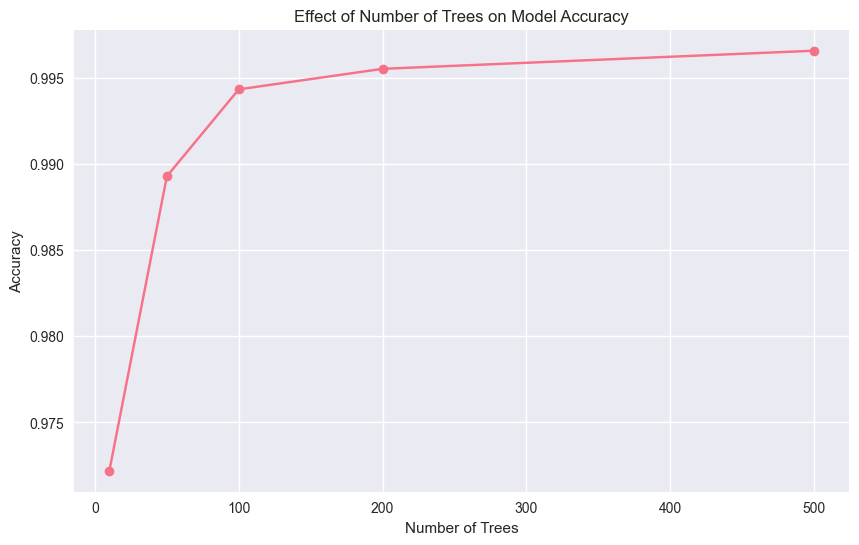

In [62]:
# Analyze Effect of Number of Trees
print("Analyzing the effect of number of trees...")
n_estimators_range, tree_results = analyze_n_estimators_effect(X_train, X_test, y_train, y_test)


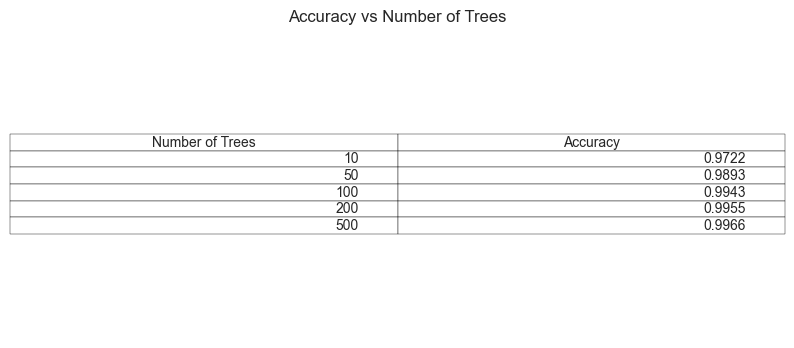

In [63]:
# Plot Results Table
plt.figure(figsize=(10, 4))
plt.table(cellText=[[str(n), f"{acc:.4f}"] for n, acc in zip(n_estimators_range, tree_results)],
         colLabels=['Number of Trees', 'Accuracy'],
         loc='center')
plt.axis('off')
plt.title('Accuracy vs Number of Trees')
plt.show()

In [64]:
# Decision Tree Classifier
print("Training Decision Tree Classifier...")
dt_clf = DecisionTreeClassifier(criterion='entropy', random_state=42)  
dt_clf.fit(X_train, y_train)
dt_predictions = dt_clf.predict(X_test)
dt_metrics = evaluate_model(y_test, dt_predictions, "Decision Tree")

Training Decision Tree Classifier...

Decision Tree Performance Metrics:
Accuracy: 0.9936
Precision: 0.9958
Recall: 0.9966

Detailed Classification Report:
              precision    recall  f1-score   support

          -1       0.98      0.98      0.98      2153
           1       1.00      1.00      1.00     12123

    accuracy                           0.99     14276
   macro avg       0.99      0.99      0.99     14276
weighted avg       0.99      0.99      0.99     14276



In [65]:
# Final Comparison
print("\nFinal Comparison:")
print("Model       Accuracy  Precision  Recall")
print("-" * 45)
print(f"GradBoost   {gb_metrics[0]:.4f}   {gb_metrics[1]:.4f}    {gb_metrics[2]:.4f}")
print(f"DecTree     {dt_metrics[0]:.4f}   {dt_metrics[1]:.4f}    {dt_metrics[2]:.4f}")



Final Comparison:
Model       Accuracy  Precision  Recall
---------------------------------------------
GradBoost   0.9967   0.9968    0.9993
DecTree     0.9936   0.9958    0.9966


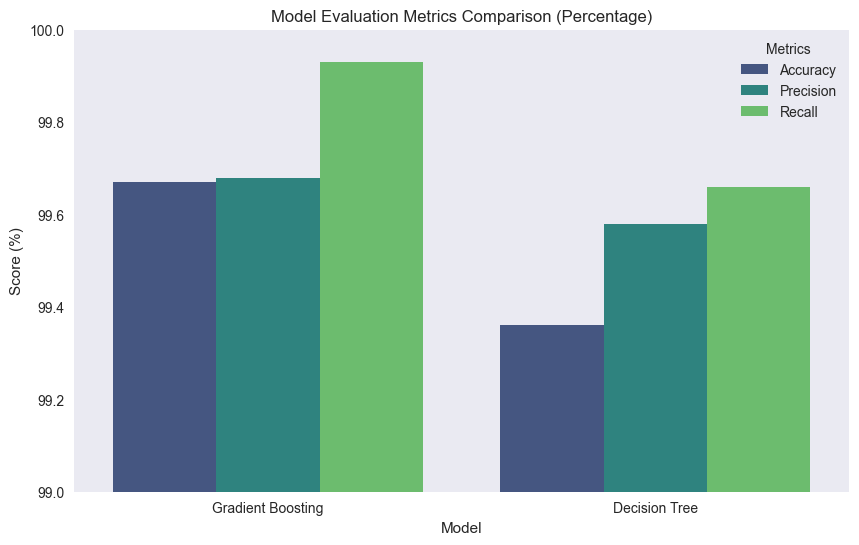

In [ ]:
metrics_data = {
    'Model': ['Gradient Boosting', 'Decision Tree'],
    'Accuracy': [0.9967, 0.9936],
    'Precision': [0.9968, 0.9958],
    'Recall': [0.9993, 0.9966]
}

metrics_df = pd.DataFrame(metrics_data)

metrics_melted = metrics_df.melt(id_vars='Model', value_vars=['Accuracy', 'Precision', 'Recall'], 
                                   var_name='Metric', value_name='Score')

metrics_melted['Score'] = metrics_melted['Score'] * 100


plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=metrics_melted, palette='viridis')

plt.title('Model Evaluation Metrics Comparison (Percentage)')
plt.xlabel('Model')
plt.ylabel('Score (%)')
plt.ylim(99, 100)
plt.grid(axis='y')

plt.legend(title='Metrics')
plt.show()